# Project 1: Cardio Good Fitness

## Objective 

Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.

You are expected to do the following :

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform uni-variate and multi-variate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers

### Step 1: Import the necessary Python packages

In [77]:
#import the necessary python packages to perform the analysis
import numpy as np #used for executing complex math operations
import pandas as pd #used to work with datasets and make dataframes
import seaborn as sns #used to make more visually appealing data visualizations from matplotlib
import matplotlib.pyplot as plt # used to make data visualizations from the dataset
from scipy.stats import skew, norm, probplot, boxcox, f_oneway # additional statistical package set
sns.set(color_codes=True) # adds a nice background to the graphs produced from seaborn
%matplotlib inline 

In [78]:
import warnings
warnings.filterwarnings('ignore')

### Step 2: Import the Dataset

In [79]:
CG = pd.read_csv('CardioGoodFitness.csv') # Import the dataset named 'CardioGoodFitness.csv'
CG.head()  # view the first 5 rows of the data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Step 3: Check the Dataset

In [4]:
CG.describe() #show the 5 point summary of the numerical data of the dataset
#count (number of inputs), mean values of each column, standard deviation, min, max, and quantile data

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
CG.shape #determine the size of the dataset, 9 columns, 180 rows

(180, 9)

In [6]:
CG.info() #determine the datatypes for each of the dataset inputs

# 6 items are numerical (int64): Age, Education, Usage, Fitness, Income, Miles
# 3 items are categorical (object): Product, Gender, Marital status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
CG.dtypes.value_counts() # this produces the same info as above with counts

int64     6
object    3
dtype: int64

### Step 4: Data Preprocessing

In [8]:
# Python can't process object data types
# Here we will convert the 'object' DTs to category
CG['Product']=CG.Product.astype('category')
CG['Gender']=CG.Gender.astype('category')
CG['MaritalStatus']=CG.MaritalStatus.astype('category')

In [9]:
#check to see if the type conversion was successful
CG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [10]:
#check to see if the dataset has any missing values
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(CG)
#check indicates there are no missing values in the set

,Total,Percent
Miles,0,0.0
Income,0,0.0
Fitness,0,0.0
Usage,0,0.0
MaritalStatus,0,0.0
Education,0,0.0
Gender,0,0.0
Age,0,0.0
Product,0,0.0


In [11]:
CG.isna().sum()
#a simpler null value check
#once again there are no mising values in the dataset

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [12]:
#CG.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


# Section 2

# EDA - Exploratory Data Analysis


## Univariate Data Distributions

* Lets visually plot our univariate variables to identify distribution of the variables in the set

<AxesSubplot:xlabel='Product', ylabel='count'>

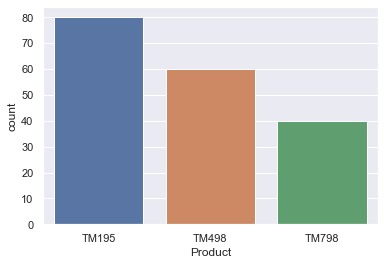

In [48]:
# Find the number of each product in the dataset
sns.countplot(CG['Product'])

* TM195 = 80
* TM498 = 60
* TM798 = 40

Total Machines = 180

<AxesSubplot:xlabel='Age', ylabel='Density'>

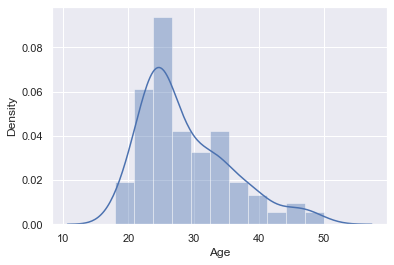

In [80]:
#plot the age variable
sns.distplot(CG['Age'])
#the plot indicates a right skew,  with peak density arount 25

<AxesSubplot:xlabel='Age'>

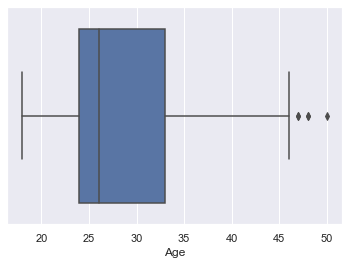

In [15]:
#use a boxplot to display the IQR of the age variable and any outlier values
sns.boxplot(CG['Age'])
#boxplot shows a median age near 26 and 3 outlier values near 47, 48, and 50

<AxesSubplot:xlabel='Gender', ylabel='count'>

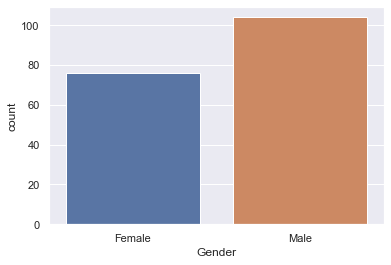

In [16]:
# Find the total count of each Gender in the dataset
sns.countplot(CG['Gender'])
# the datset looks to have about 75 female entries, and 105 male entries

<AxesSubplot:xlabel='Education', ylabel='Density'>

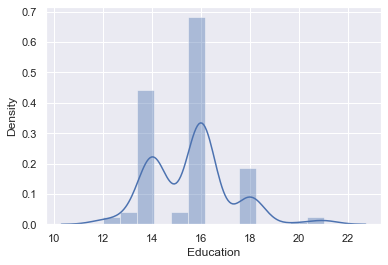

In [17]:
#plot the education variable
sns.distplot(CG['Education'])
#the plot looks to have a relatively normal distrubtion with most of the density at 16 or 14 years

median education is 16.0
average education is 15.572222222222223


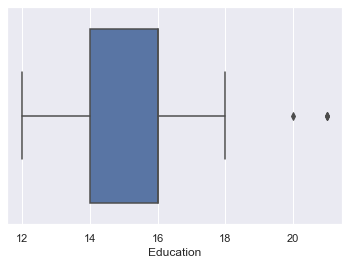

In [18]:

sns.boxplot(CG['Education'])
# the boxplot similarly idicates a relatively even distribution with only 2 outlier values at 20 and 21
#no median is indicated
print(('median education is'),np.median(CG['Education']));
#the median Education value is 16
print(('average education is'), np.mean(CG['Education']))
#mean value is 15.57 - close to the median indicating the outliers are not severly impacting the average

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

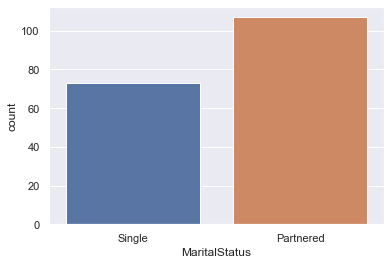

In [81]:
# Detmine the split in marital status of respondants
sns.countplot(CG['MaritalStatus'])
#count indacates about 105 purchasers are Partnered while only about 75 are single


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

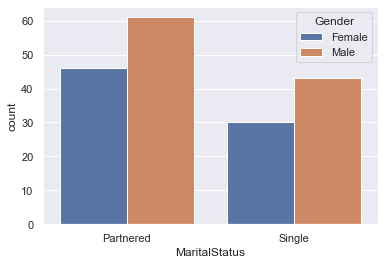

In [20]:
sns.countplot(CG['MaritalStatus'], hue=(CG['Gender']))
#the split in users between marital status by gender appears to be roughly equal with overall marital status

<AxesSubplot:xlabel='Income', ylabel='Density'>

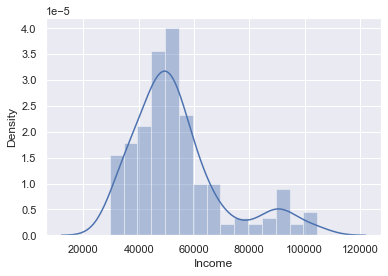

In [21]:
#plot the income variable
sns.distplot(CG['Income'])


<AxesSubplot:xlabel='Income'>

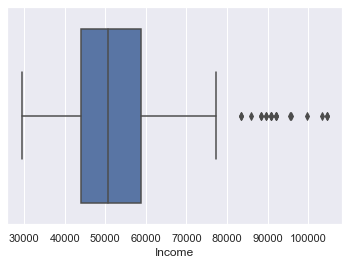

In [22]:
sns.boxplot(CG['Income'])
#the income variable is fairly spread from under $30,000 with several outlier values over $80,000
#median income is just over $50,000
#the Histogram is fairly grouped with a right swew

<AxesSubplot:xlabel='Usage', ylabel='Density'>

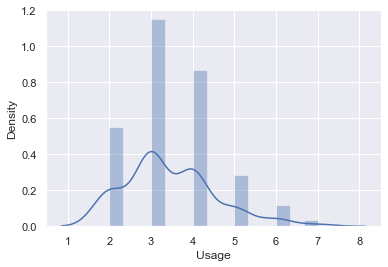

In [23]:
#plot the Usage variable
sns.distplot(CG['Usage'])

<AxesSubplot:xlabel='Usage'>

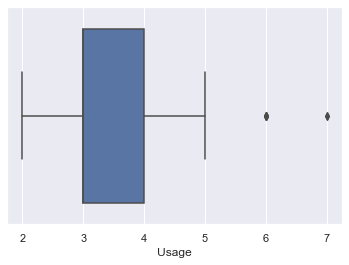

In [24]:
sns.boxplot(CG['Usage'])
#most users tend to use the treadmill 3 or 4 times/week. Some outliers use the treadmill 6 or 7 times/week

<AxesSubplot:xlabel='Miles', ylabel='Density'>

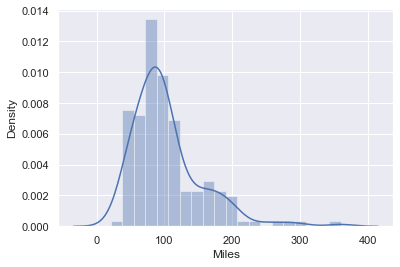

In [25]:
#plot the Miles variable
sns.distplot(CG['Miles'])
#shows a central tendency around 90-100 miles
# it appears some outliers read at 300 or close to 400 miles
# The the high number of positive outliers makes the graph skew heavily right

<AxesSubplot:xlabel='Miles'>

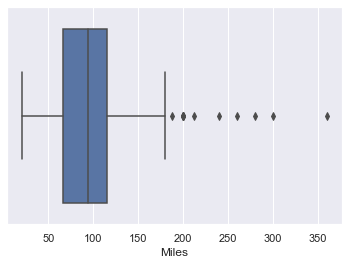

In [26]:
sns.boxplot(CG['Miles'])
#the box plot indicates the median around 90 miles and several outliers past 180 miles

### Univariate Data Plotting Observations
The above Univariate plot graphs tell us about our user base, and our products:
1. The most reported unit in the sample is the TM195, followed by the TM498, and finally the TM 798
2. The median age of our users is 26 and the mean around 28, the distribution graph is right skewed with the highest density of age values under 30, but with several values going to age 50. The age IQR is 9
3. We have more male users in the sample than female by about 30 entries
4. The education level of users is fairly evenly distributed from 12 to 21 with a median of 16, and a mean of 15.57
5. There are more partnered users in the study by nearly 40 points
6. There does not seem to be a relationship between gender diffence and marital status difference
7. The income variable is fairly widely distributed with a min of 29,562 and a max of 104,581
8. Median income is about 50,600 Mean income is about 53,700. This is indicated in the right skew of the histogram and boxplot with the higher outlier incomes swewing the graph to the right
9. Treadmill usage is fairly evenly distributed with just a few outlier values outside of the IQR
10. The miles variable has a large range and several outliers outside of the IQR. With a minimum value of 21 up to a max of 360. The median is 94 with a mean of 103, suggesting those outlier values are skewing the mean positively



## Multivariate Analysis
   * Now lets use multivariate techniques to compare the variables of our data with one-another and determine what relationships exist within the data

In [28]:
# Check for correlation among numerical variables
CG.corr()

#this will make a dataframe showing the correlation between variables
#the dataframe is hard to read and understand at a glance

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


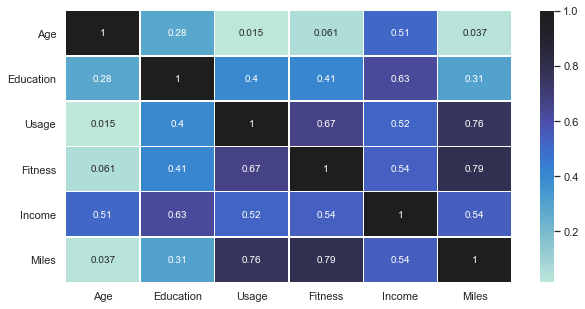

In [29]:
# This graph will plot a heatmap of all the numerical values and idicate if there are correlated relationships
# A heatmap provides an easy way to visualize the correlations between variables
plt.figure(figsize=(10,5))
sns.heatmap(CG.corr(), annot=True, linewidths=.5, center = 1 )  # heatmap
plt.show()

### Heatmap Observations

1. Age -- doesn't have a high correlation with any of the variables, it's closest is income at .51
2. Education -- doesn't have any strong correlations, Income again is it's highest at .63
3. Usage -- higher levels of correlation with miles at .76, fitness at .67, and curiously income at .52. These correlations make sense as we would assume a user with more usage might put on more mileage and be more fit in general. The income correlation isn't extremely high, but it is interesting and we will explore that further.
4. Fitness -- as indicated with usage it correlates most closely with miles at .79, usage at .67, and income at .54
5. Income -- the income variable correlates in a range between .51 and .63 with all variables, education being the highest
5. Miles-- correlates highly with Fitness (.79), Usage (.76), Income (.54)

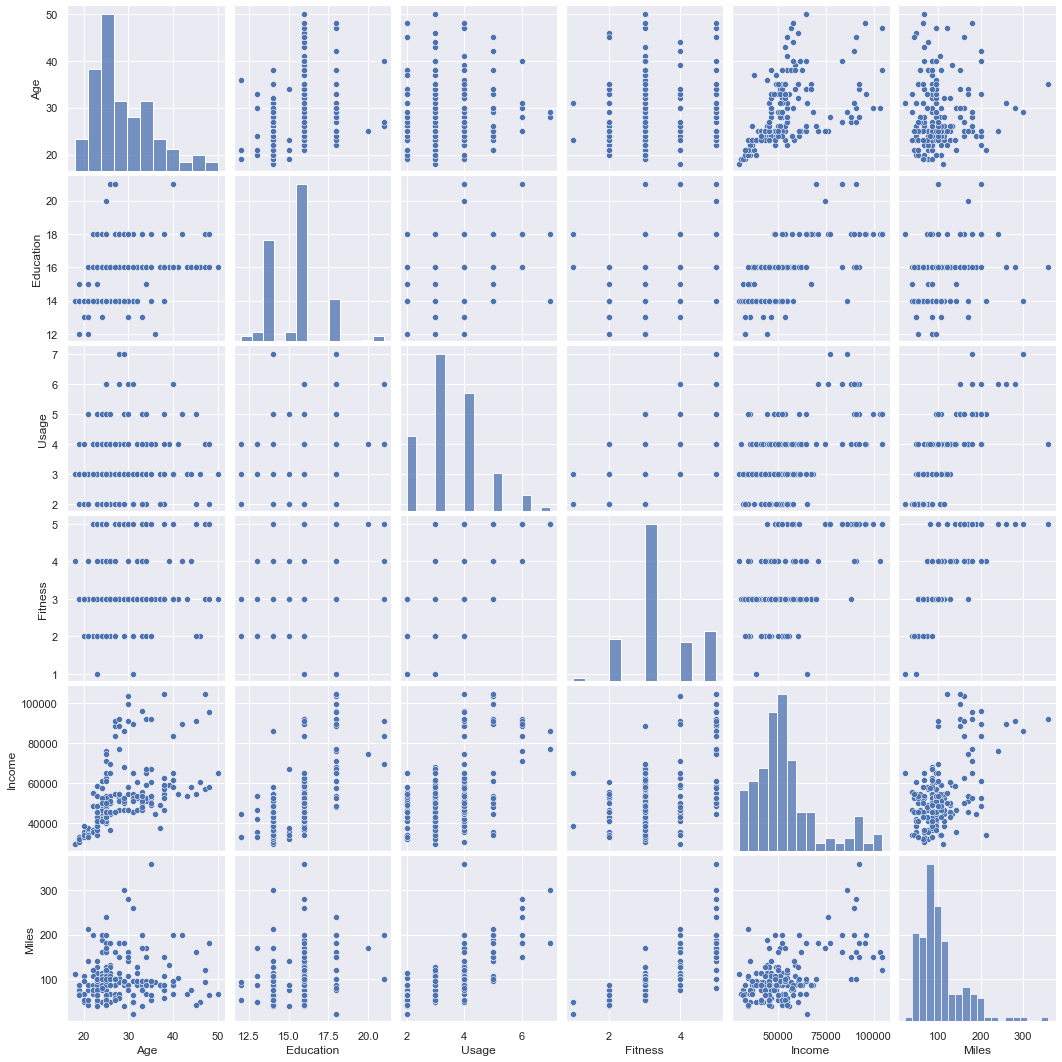

In [51]:
# A pairplot allows us to further visualize the relationships of numerical variables
sns.pairplot(CG)

### Pairplot Observations
   * We can visualize on the scatterplots of variable relationships with low correlation the very random spread of dots on the graph
   * On the scatterplots of variable relationships with high correlations we can see the dots are arranged in a more or less linear fashion

In [30]:
np.count_nonzero(CG['Product'])

180

<AxesSubplot:xlabel='Gender', ylabel='count'>

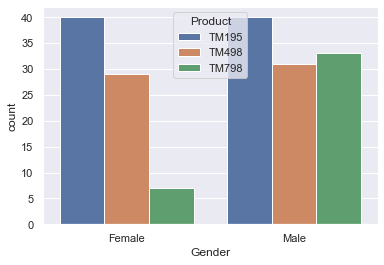

In [62]:
sns.countplot(CG['Gender'], hue=(CG['Product']))
#Here I wanted to plot the diffence in product user spilt by Gender. Two Categorical variables
#We can see the split between product usage on gender is very similar between the TM195, and TM498
#There is a big difference beween usage by Gender of the TM798
#Males have about 33 TM798 units Vs. Females at only around 7 - almost 5X difference

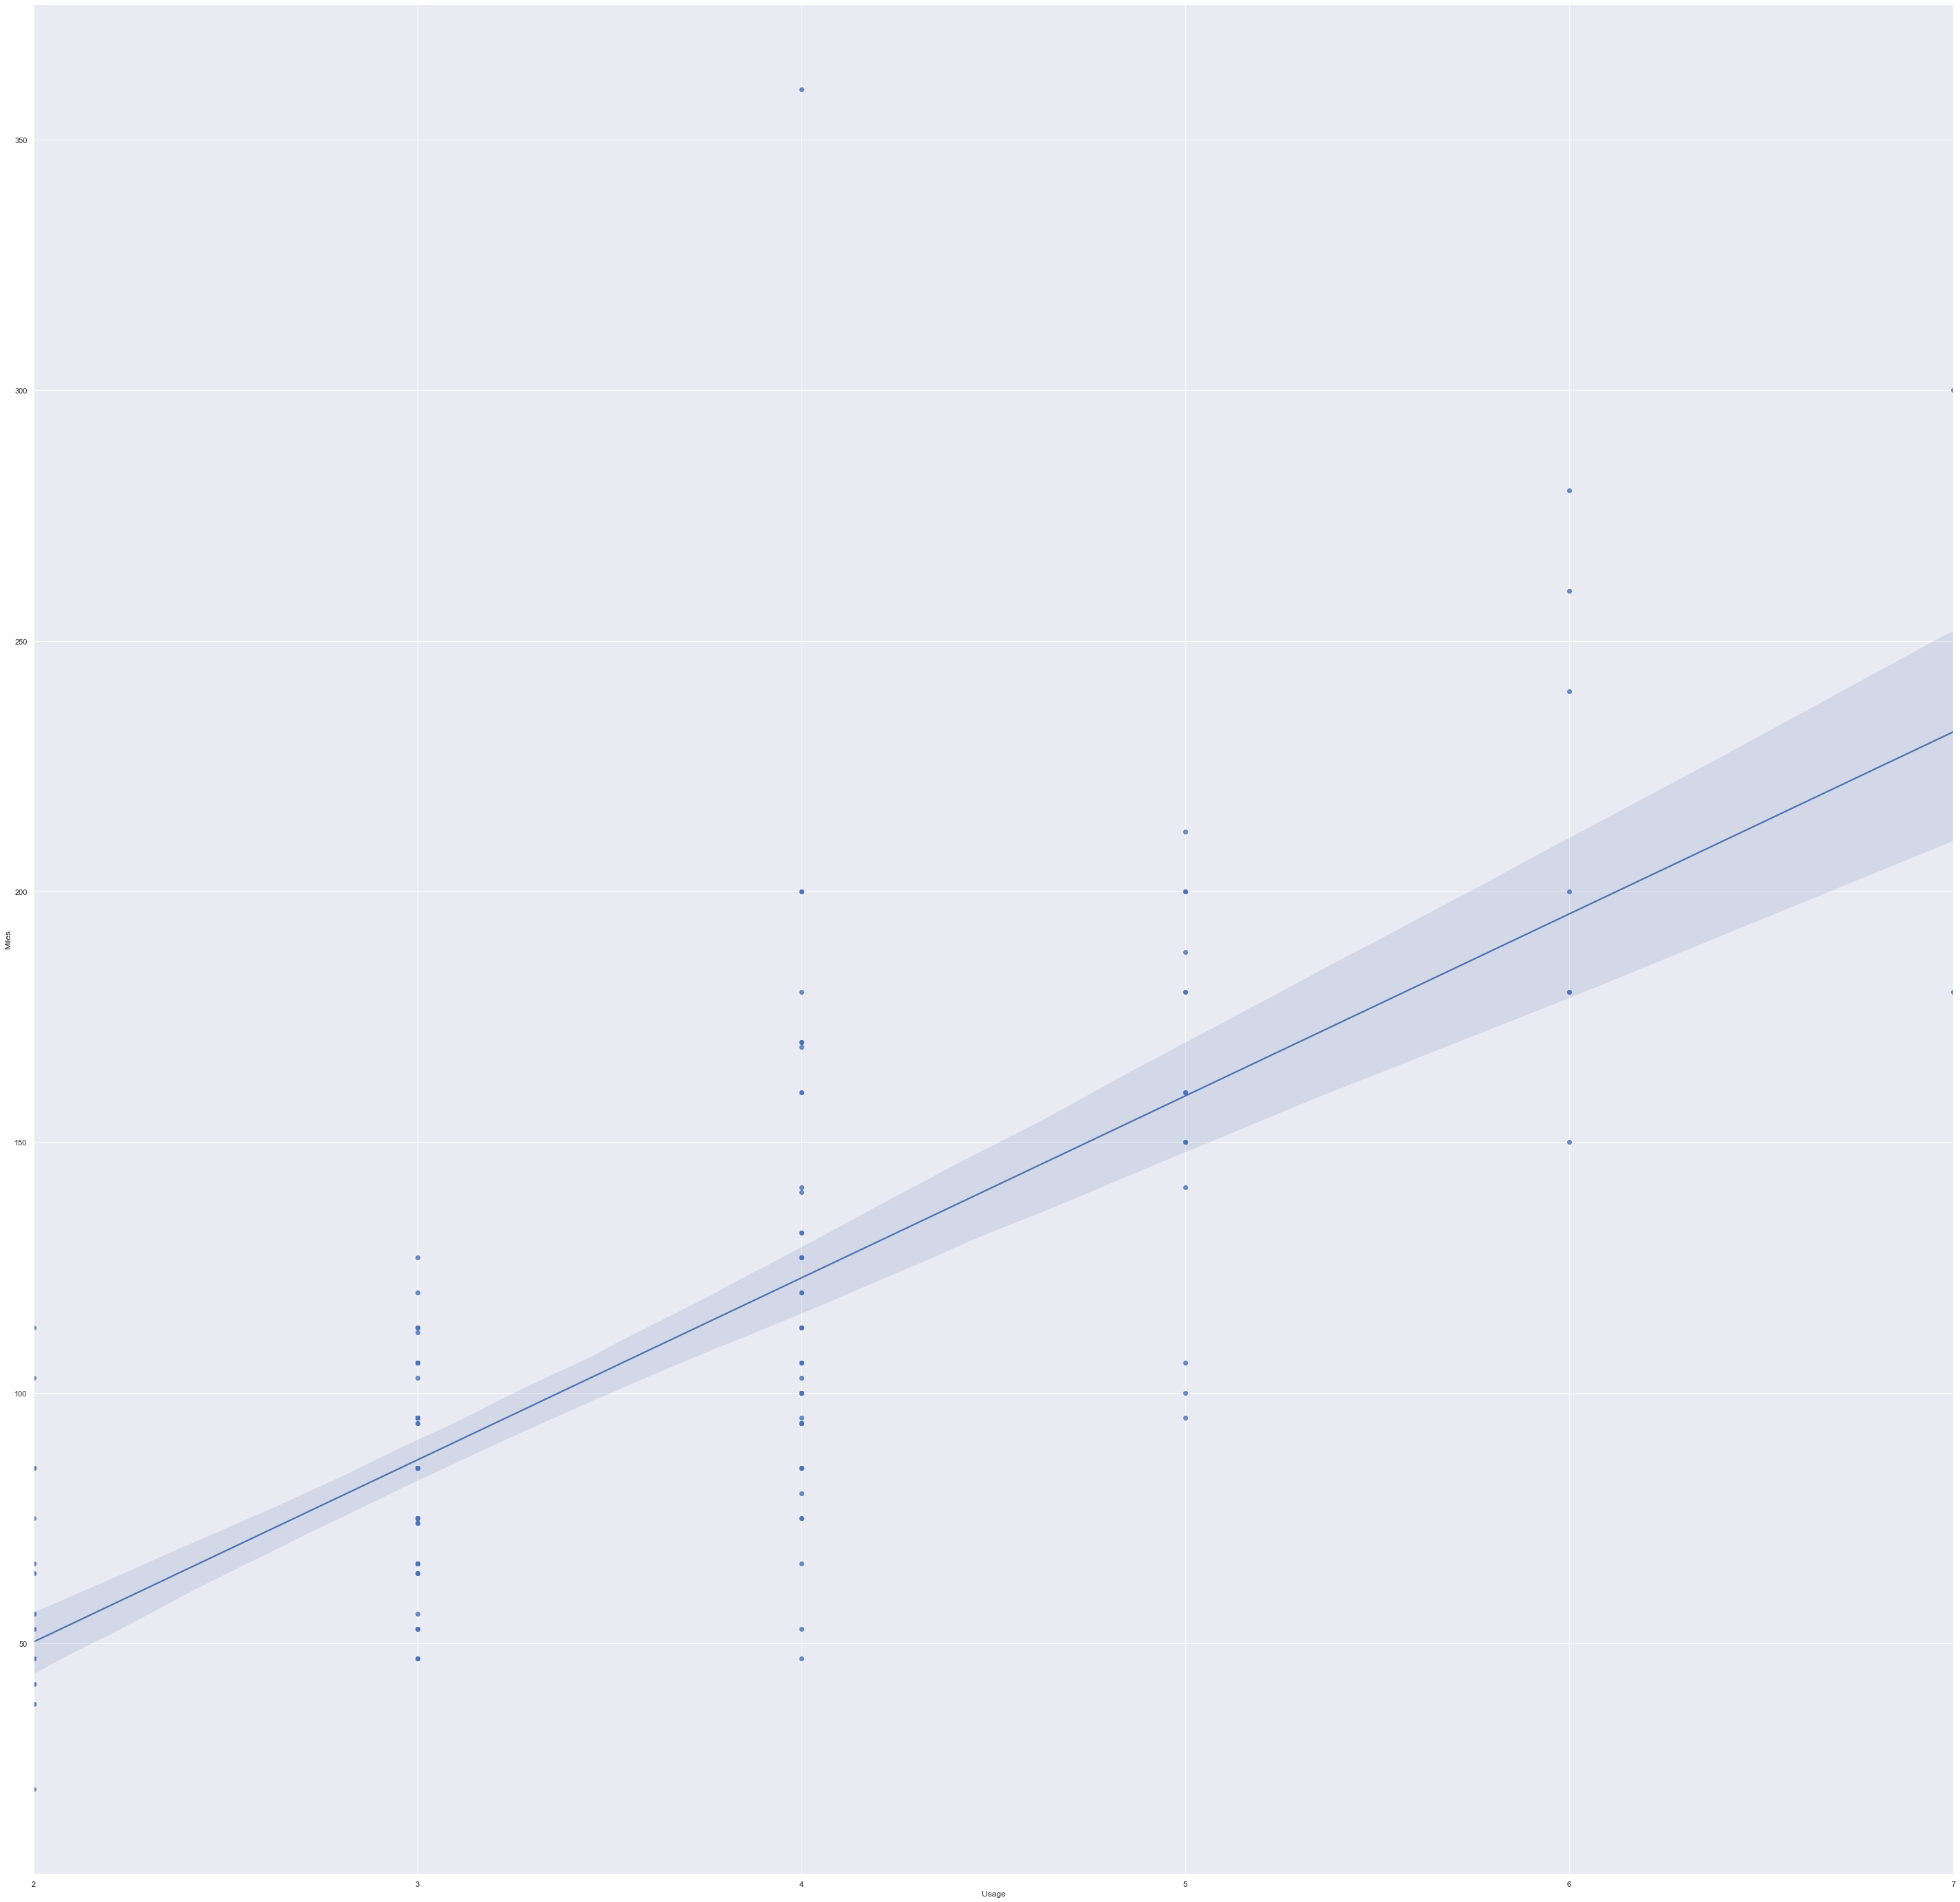

In [32]:
figure = plt.figure(figsize=(50,50))

ax = sns.regplot(x='Usage',y='Miles', data=CG ) # regression plot - scatter plot with a regression line
# This plots a scatterplot with a regression line showing a positive correlation between Usage and Miles

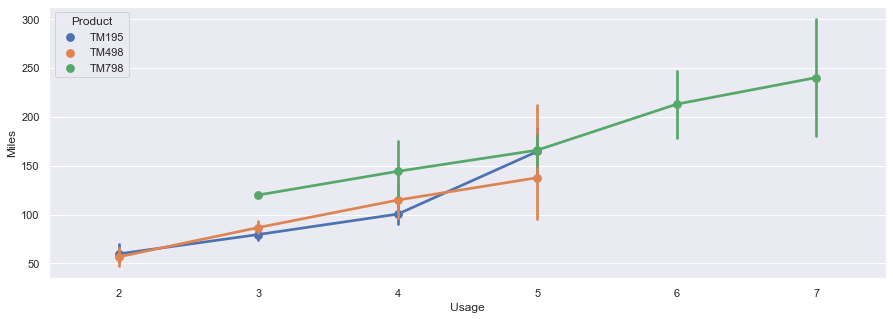

In [52]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Usage", y="Miles", hue = 'Product',  data=CG)
plt.show()

#here we are plotting Usage and Miles - Which we know to be positvely correlated, separated by Product model

# We can see that the TM195 (blue) and TM498(orange) models have roughly similar usage patterns
# The TM798 has the highest overall usage and a higher mileage to usage ratio than the other models


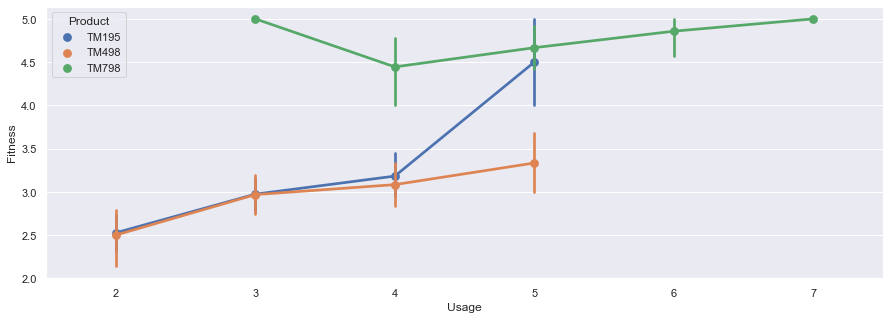

In [54]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Usage", y="Fitness", hue = 'Product',  data=CG)
plt.show()

#this is the same graph but with fitness level indicated against usage as well
# we know that fitness and usage are not as strongly correlated (.67) as Miles and Usage (.76)
# Still an interesting comparison as the usage graph does tend to increased usage with Fitness level
# The TM798 model Fitness level generally starts and remains above that of the other Models
# Suggest TM798 users are generally at a higher fitness level than other Model users

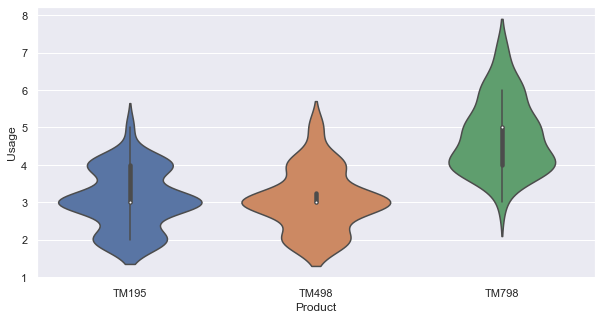

In [55]:
plt.figure(figsize=(10,5))
sns.violinplot(x=CG.Product, y=CG['Usage'])
plt.show()
# here's a violin chart showing the distribtions of Usage across Models
# Again we see the 195, and 498 models exhibiting similar usage overlap, the 798 model has the highest usage

### Income associated multivariate analysis

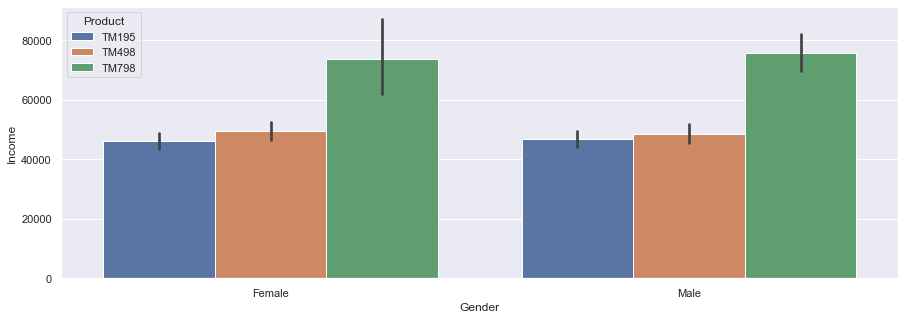

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(data=CG,x='Gender',y='Income',hue='Product')
plt.show()

# We saw a correlation over 50 with income and all other Numerical values
# This bar plot shows the Product usage separted by income level
# Shows the 195 and 498 are owned by users typically below or just above the mean income level ($53,719)
# the TM798 shows typical owners with an above average income level

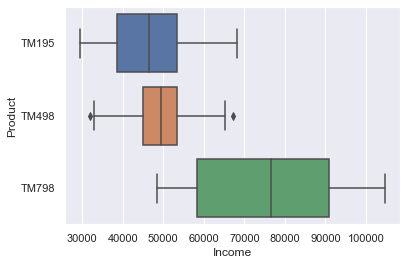

In [71]:
sns.boxplot(CG['Income'], CG['Product']);
# this boxplot again shows the income spread amoing the Product variables
# Appears that the TM195 and TM498 essentially encompass a very similar income bracket

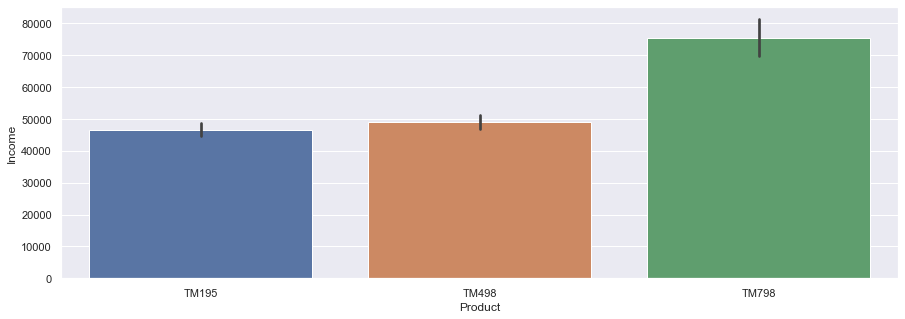

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(data=CG,x='Product',y='Income')
plt.show()
# this just shows the same data without separating by the Gender variable.
# Across the board the TM195 has owners with the lowest income, TM498 owners have slightly higer income
# TM798 typically has owners with much higher income levels with a median around $75,000


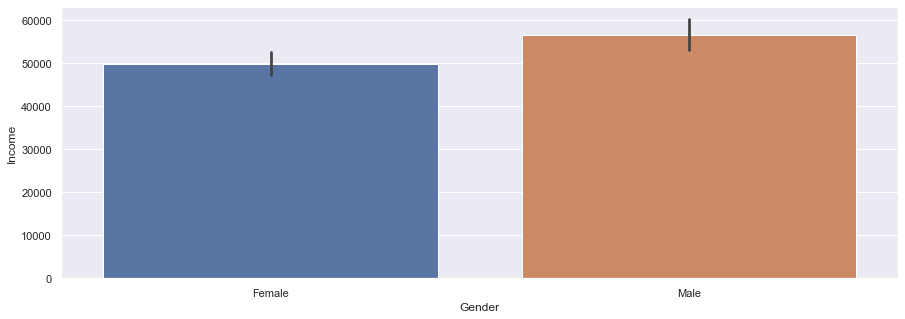

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(data=CG,x='Gender',y='Income')
plt.show()

# The income level between Male and Female users are separated by over $5,000 at the median
# With the differences we saw in purchase behavior for the TM798 model by gender this could be a contributing factor


### Oberservations

From the above graphs we can infer the following information:

1. Users of the TM195 and TM498 models have similar usage and mileage statistics
2. Users of TM798 typically have higher usage and mileage statistics
3. Users of TM798 typically have an income level well above average
4. Men and Women have the TM195 and TM498 models at a similar rate, but many more men in the sample have the TM798 model compared to women
5. Male income in the sample is higher on average than Female income - this could account for the higher ownership rate of the TM798 among men

## Fitness, Age, Gender and Marital Status multivariate analysis

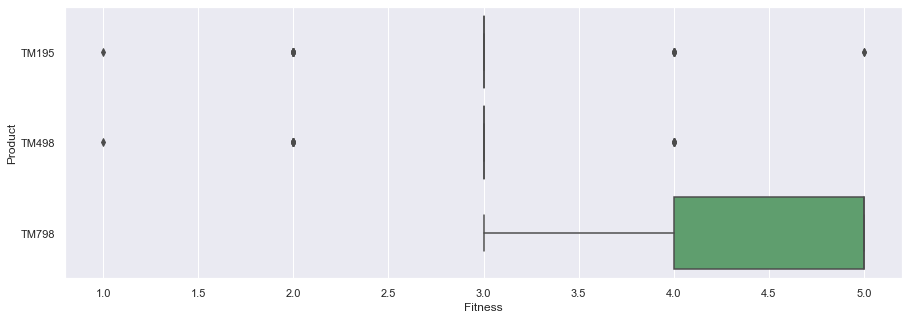

In [74]:
plt.figure(figsize=(15,5))
sns.boxplot(CG['Fitness'], CG['Product']);
# The boxplot probably isn't the best visualization of these metrics
# We can see the plots for the TM195 and TM498 look extremely similar
# The TM798 is the only product with a visualized IQR at the far right of the scale

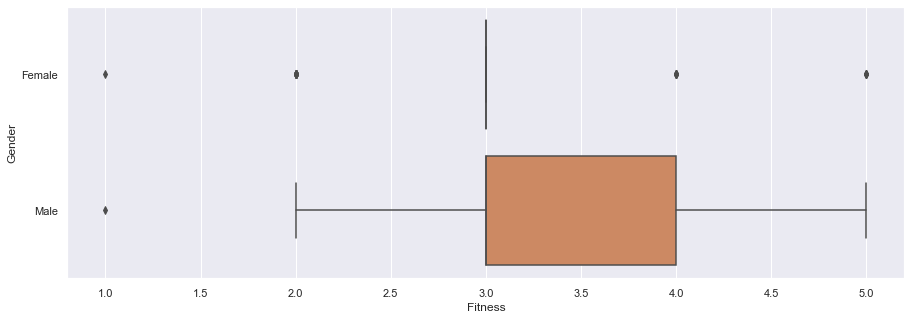

In [75]:
plt.figure(figsize=(15,5))
sns.boxplot(CG['Fitness'], CG['Gender']);

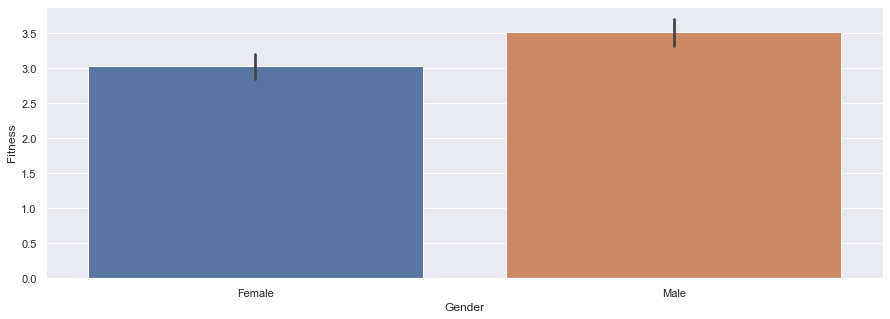

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(data=CG,x='Gender',y='Fitness')
plt.show()

#the male fitness level in the sample is also higher than female fitness level on average


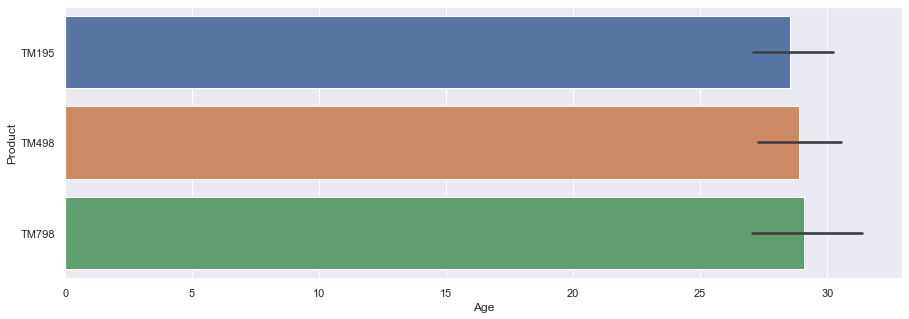

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(data=CG,x='Age',y='Product')
plt.show()

#the age of the user doesn't seem to heaviy correlate to the products they use
# The TM195 skews slightly younger, TM498 in the middle, TM798 slightly older, overlap accross most
# Age is probably not a strong determinent of product model usage

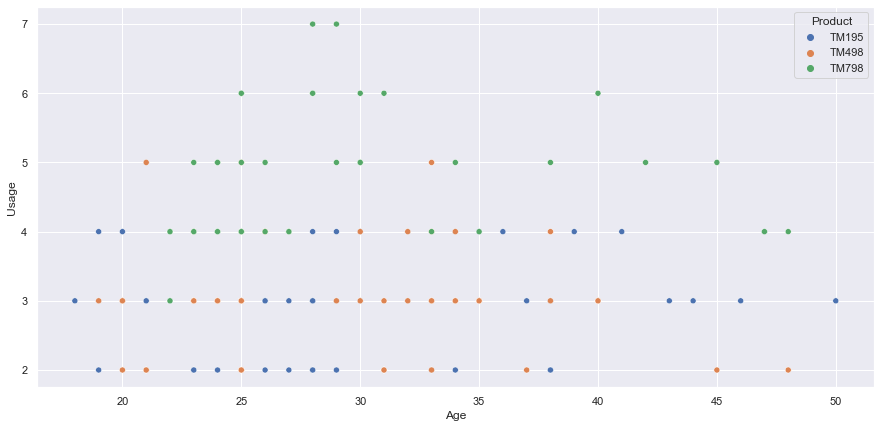

In [40]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='Age', y='Usage', hue='Product', data=CG) # scatter plot 
plt.show()

#this scatter plot shows roughly the same thing, there isn't large groupings in product usage amoung specific age groups

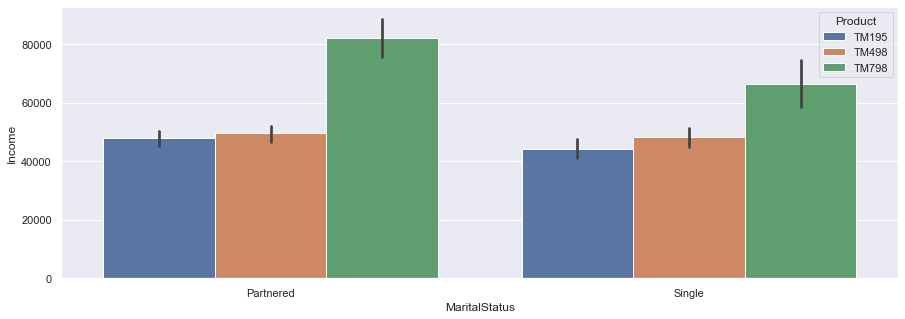

In [56]:
# Plot the product ownership and product split separated by marital status
plt.figure(figsize=(15,5))
sns.barplot(data=CG,x='MaritalStatus',y='Income',hue='Product')
plt.show()



<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

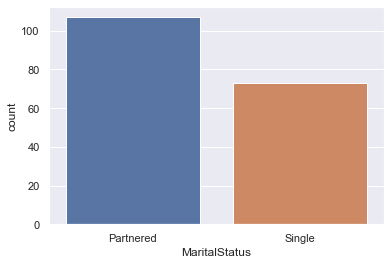

In [58]:
sns.countplot(CG['MaritalStatus'])
# 105 Partnered users
# 75 Single users

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

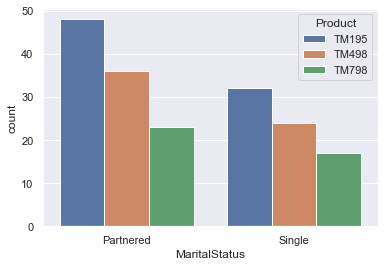

In [47]:
# Use a count plot to detmine if the product mix is different between single and partnered respondants
sns.countplot(CG['MaritalStatus'], hue=(CG['Product']))

#the overall machine count has a similar trend regardless of Marital Status

### Observations
   * Males have a slightly higher average Fitness level than Females in the sample
   * There is no strong correlation visible between age and Product use
   * Marital status does not seem to strongly affect the Product use mix
    

# Pandas Profile Report

In [59]:
#import pandas_profiling
import pandas_profiling 

In [60]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [61]:
#Getting the pandas profiling report 
pandas_profiling.ProfileReport(CG)

# Conclusions

## Customer Profile

### Product TM165
   * Typically lower to just above average income users
   * Usage ranges from low to just above average
   * No strong association of product usage to age of user - lowest average, lowest overall but there is overlap in age of owners across products
   * Most popular product
   * Same number of female and male product users in the sample 
    
### Product TM468
   * Slightly higher average income user compared to TM165 user, but still within its range
   * Very similar usage as TM165 - Usage ranges from low to just above average
   * No strong association of product usage to age of user - middle average, but there is overlap in age of owners across products
   * Slightly lower female vs male ownership in the sample
    
### Product TM798
   * Significantly higher average income user
   * Generally above average usage, miles, and fitness level user
   * 5x more male users than female users in the sample
   * No strong association of product usage to age of user - highest average and highest overall, but there is overlap in age of owners across products
   
   ## Insights
   
   1. The TM165 and TM468 producs have very similar customer profiles. The TM165 appears to sell in a higher volume. Both models have users essentially encompassed within the same income bracket.
   2. From the data analyzed it seems the TM165 and TM465 are so similar as to be almost interchangeable
   3. We would need some additional data on model differences such as price, features, appearence etc. To determine why there may be a discrepency in sales between the two producs
   4. The TM798 looks to appeal to a more 'hardcore' user. Users tend to put more usage, more mileage, and have a higher overall fitness level compared to users of the other two machines.
   5. The TM798 also appeals to users with significantly higher incomes on average.
   6. The TM798 was reported to have much higher ownership and usage with men over women by 5X. Female users in the sample on average have a lower fitness level and a lower income level than males. This could account for the lower female ownership rate of the TM798 as it looks to appeal to higher income users with higher fitness levels

## Recommendations

### 1. Determine reasons why some users prefer the TM468 model over the TM165 and vice versa
   * Capture more data about product differences, price, appearance, and marketing to help determine these reasons
   
### 2. The TM165 and TM468 seem to appeal to the same user base
   * Are the 2 separate models necessary?
   * Which model is the most profitable?
   * Could we possibly consolidate the product line to one of the 2 models to streamline and maximize profits without losing customers?
   * Are there product features that could be added to or changed to appeal to other user groups?
   
### 3. There is a large gap in average income, fitness level, Gender and Usage between the 2 lower models (TM165, TM468) and the higher-end model (TM798)
   * Is there room in-between the lower and higher end product for us to capture more of the market?
   * There may be room to differentiate the TM468 model more from the TM165 model to capture more of the middle section of the the market as opposed to overlapping the TM165 market.
   * Can we target the TM798 model to Female users more? The TM798 userbase is heavily male skewed.
   * What attributes of the TM798 model can we identify that might make it more appealing to Male vs Female users?